# **Application Data_Quality **

Dans cette application nous allons appliquer une demarche personnelle afin de detecter des eventuelles anomalies dans les données pour cela , nous allons utiliser  un ensemble de données réelles disponible sur Kaggle


La premiere etape est de se connecter avec google colab puis importer notre jeu de données 

In [24]:
#céer une connection avec google colab
from google.colab import drive
drive.mount('/content/drive')

#importer  la librairie Pandas
import pandas as pd
#lecture du fichier " avec la fonction read_csv de pandas
#header = 0, la première ligne correspond à l'entête (intitulé des champs)
data = pd.read_csv("/content/drive/MyDrive/MIAGE Nanterre/memoire/data/datatest5.csv" , sep=',' ,encoding='windows-1252' )



#afficher les dimensions de la table des données (propriété shape)
print (data.shape)
#afficher la liste des colonnes data.columns
print (data.columns )
#description des données
data.describe(include='all')
print (data.dtypes )


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(6001, 12)
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'target_class'],
      dtype='object')
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
target_class         int64
dtype: object


**Pré-traitement **
transformer les differentes colonnes 

In [25]:
from sklearn import preprocessing

data["Gender"]= preprocessing.LabelEncoder().fit_transform(data["Gender"])
#Labellisation des champ texte
data["Geography"]= preprocessing.LabelEncoder().fit_transform(data["Geography"])
 

 
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,target_class
0,502,0,2,2,8,159660.80,3,1,0,113931.57,1,1
1,699,0,22,2,1,0.00,2,0,0,93826.63,0,1
2,850,2,2,2,2,125510.82,1,1,1,79084.10,0,1
3,645,2,9,17,8,113755.78,100,1,0,149756.71,1,1
4,822,0,9,17,7,0.00,2,1,1,10062.80,0,1


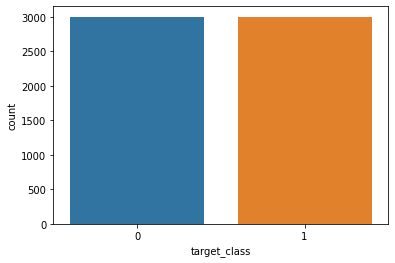

In [26]:
#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

v=data['target_class']
sns.countplot(x=v)


In [27]:
#importer la classe SVC
from sklearn.svm import LinearSVC
from  sklearn.svm import SVC

#get only the data
X = data.drop(['target_class'], axis=1)
#get only the lables
y = data['target_class']

# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [60]:


 
#standardize X_train
X_train = (X_train-X_train.mean())/X_train.std()

#standardize X_test
X_test = (X_test- X_test.mean())/X_test.std()

#head_print
X.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-1.525384,-0.897765,-0.780047,-1.930994,1.030692,1.341038,-0.025990,0.652185,-1.024376,0.219215,1.976395
1,0.508614,-0.897765,2.752431,-1.930994,-1.381895,-1.220128,-0.026746,-1.533053,-1.024376,-0.129680,-0.505888
2,2.067669,1.515983,-0.780047,-1.930994,-1.037240,0.793228,-0.027502,0.652185,0.976041,-0.385517,-0.505888
3,-0.048928,1.515983,0.456320,-0.964885,1.030692,0.604662,0.047347,0.652185,-1.024376,0.840913,1.976395
4,1.778573,-0.897765,0.456320,-0.964885,0.686037,-1.220128,-0.026746,0.652185,0.976041,-1.583291,-0.505888


Text(91.68, 0.5, 'Valeurs réelles')

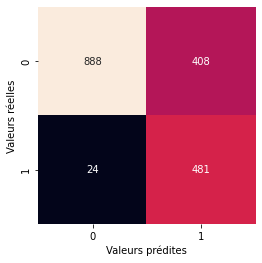

In [110]:
#-------------
       #svm
#------------
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
from sklearn import metrics
# instantiate classifier with default hyperparameters
svc=SVC( ) 

# fit classifier to training set
svc.fit(X_train,y_train)
# make predictions on test set
y_pred_SVM=svc.predict(X_test)
#importer le module seaborn (pour la matrice de confusion)
import seaborn as sns
import matplotlib.pyplot as plt
#création et affichage de la matrice de confusion
from sklearn.metrics import confusion_matrix 
conf_SVM = confusion_matrix(y_pred_SVM, y_test) 
sns.heatmap(conf_SVM, square=True, annot=True, cbar=False, fmt="#")        
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')

In [100]:
#-------------------------
#Validation croisé SVM
#-------------------------
from sklearn.model_selection import cross_val_score
clf = svm.SVC(  C= 1000.0, gamma= 0.01, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scoresSVM=scores.mean()

print("%0.3f accuracy with a standard deviation of %0.2f" % (scoresSVM, scores.std()))

0.893 accuracy with a standard deviation of 0.06


In [31]:
import numpy as np
from sklearn import svm
from sklearn import model_selection


# choisir 6 valeurs pour C, entre 1e-2 et 1e3
C_range = np.logspace(-2, 3, 6)

# choisir 4 valeurs pour gamma, entre 1e-2 et 10
gamma_range = np.logspace(-2, 1, 4)

# grille de paramètres
param_grid = {'C': C_range, 'gamma': gamma_range}

# critère de sélection du meilleur modèle
score = 'roc_auc'

# initialiser une recherche sur grille
grid = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), 
                                    param_grid, 
                                    cv=5, # 5 folds de validation croisée  
                                    scoring=score)

# faire tourner la recherche sur grille
grid.fit(X_train, y_train)

# afficher les paramètres optimaux
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_, grid.best_score_))

The optimal parameters are {'C': 1000.0, 'gamma': 0.01} with a score of 0.91


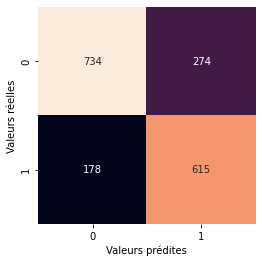

In [111]:
#-------------
       #regression logistique 
#------------

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred_Log = clf.predict(X_test)
 
#création et affichage de la matrice de confusion
conf_log = confusion_matrix(y_pred_Log, y_test) 
sns.heatmap(conf_log, square=True, annot=True, cbar=False, fmt="#")
           
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles');

In [96]:
#Validation croisé poure La regression logistique
from sklearn.model_selection import cross_val_score
clf = LogisticRegression()
scoresRLog = cross_val_score(clf, X, y, cv=5)
scoresRL =scoresRLog.mean()
print("%0.3f accuracy with a standard deviation of %0.2f" % (scoresRL, scoresRLog.std()))



0.752 accuracy with a standard deviation of 0.06


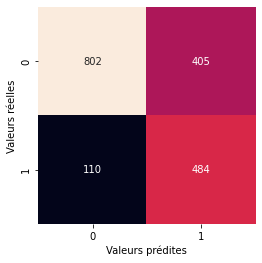

In [112]:
#---------------------------------
#Modèle KNN
#---------------------------------

# avec comme parametre 
from sklearn import neighbors
clf_KNN = neighbors.KNeighborsClassifier(n_neighbors=14)
clf_KNN.fit(X_train,y_train.ravel())
y_pred_KNN=clf_KNN.predict(X_test)

#création et affichage de la matrice de confusion
 
conf_KNN = confusion_matrix(y_pred_KNN, y_test) 
sns.heatmap(conf_KNN, square=True, annot=True, cbar=False, fmt="#")       
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles');

In [114]:
#---------------------------------
#Cross validation KNN 
#---------------------------------

from sklearn.model_selection import cross_val_score
scoresKNN = cross_val_score(clf_KNN, X, y, cv=5)
scoresK = scoresKNN.mean()
print("%0.2f accuracy with a standard deviation of %0.2f" % (scoresK.mean(), scoresKNN.std()))
 
 

0.71 accuracy with a standard deviation of 0.06


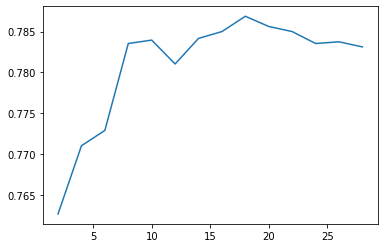

In [21]:

#---------------------------------
#Modèle KNN recherche de la meilleure valeur de K
#---------------------------------

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12)

hyper_params = {"n_neighbors":range(2,30,2)}

from sklearn.model_selection import GridSearchCV


grid_res=GridSearchCV(knn,hyper_params)

grid_res.fit(X_train,y_train)

import matplotlib.pyplot as plt

f=plt.plot(grid_res.cv_results_['param_n_neighbors'].filled(0),grid_res.cv_results_["mean_test_score"])

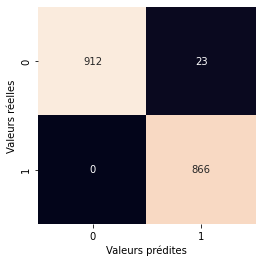

In [108]:


#---------------------------------
#  RONDOM FOREST
#---------------------------------

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(criterion='entropy')   


# fit classifier to training set
rf_clf .fit(X_train,y_train)
# make predictions on test set
y_pred_rf=rf_clf.predict(X_test)

#création et affichage de la matrice de confusion
 
conf_rfo = confusion_matrix(y_pred_rf, y_test) 
sns.heatmap(conf_rfo , square=True, annot=True, cbar=False, fmt="#")       
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles');





In [113]:
#---------------------------------
#Cross validation random forest
#---------------------------------

from sklearn.model_selection import cross_val_score
scoresRFOREST = cross_val_score(rf_clf, X, y, cv=5)
scoresRF = scoresRFOREST.mean()
print("%0.2f accuracy with a standard deviation of %0.2f" % (scoresRF, scoresRFOREST.std()))

 

0.98 accuracy with a standard deviation of 0.02


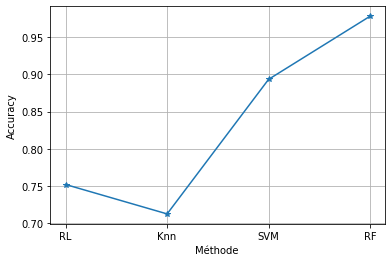

In [104]:
#---------------------------------
#calcul accuracy pour chaque modele
#--------------------------------- 
from sklearn.metrics import accuracy_score
 

#ajouter les resultats a une liste 
list_m = ['RL', 'Knn' ,'SVM','RF']
list_x = [1, 2,3,4]
list_accuracy = []
list_accuracy.append(scoresRL)
list_accuracy.append(scoresK)
list_accuracy.append(scoresSVM)
list_accuracy.append(scoreRF)

 

plt.plot(list_x, list_accuracy, '*-')
plt.xticks(list_x, list_m)
plt.grid()
plt.xlabel("Méthode ")
plt.ylabel("Accuracy")
plt.show()
 